In [3]:
from IPython.display import Image, display
import operator
from typing import Annotated,List, Literal, TypedDict 
from langgraph.graph import END, START, StateGraph
from langgraph.types import Command, interrupt


In [5]:
class State(TypedDict):
    nlist : List[str]

In [6]:
def node_a(state : State) -> State :
    print(f"node a is receiving {state['nlist']}")
    note = "This is node_A"
    return State(nlist = [note])

In [7]:
builder = StateGraph(State) # state graph lets you define all nodes, edges and shared state to control the workflows
builder.add_node("a", node_a)

builder.add_edge(START,"a")
builder.add_edge("a",END)
graph = builder.compile()

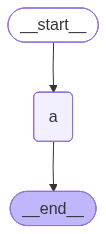

In [ ]:
display(Image(graph.get_graph().draw_mermaid_png())) # code to generate a png

In [9]:
# to generate a mermaid code 
print(graph.get_graph().draw_mermaid())

---
config:
  flowchart:
    curve: linear
---
graph TD;
	__start__([<p>__start__</p>]):::first
	a(a)
	__end__([<p>__end__</p>]):::last
	__start__ --> a;
	a --> __end__;
	classDef default fill:#f2f0ff,line-height:1.2
	classDef first fill-opacity:0
	classDef last fill:#bfb6fc



In [10]:
initial_state = State(
    nlist = ["Hello Node a , how are you"]
)

graph.invoke(initial_state)

node a is receiving ['Hello Node a , how are you']


{'nlist': ['This is node_A']}